In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

In [5]:
plt.rcParams.update({'legend.fontsize':12,
                     'font.size':14,
                     'lines.linewidth':2})

In [10]:
## Long term pCO2 - Krissansen-Totton et al. 2018

all_output = np.load('data/kt_data.npy')
age = all_output[4,:,0]/1e9
confidence_CO2 = st.scoreatpercentile(all_output[6,:,:],
                                      [2.5,50,97.5], # lower 95% confidence interval, median, and upper 95% confidence interval
                                      interpolation_method='fraction',axis=1)
CO2_KT = confidence_CO2*1e6 # convert to ppm

# starting inventory
n_bar = np.sqrt(CO2_KT[1]/287)

In [11]:
# climate response time scale
alpha = 2*0.5
V = 6
N_pi = 2.83

k = alpha*V/(N_pi*n_bar)

In [12]:
# t max
m = 1
tmax = np.log(k/m)/(k-m)

# perturbation strength
f0 = 1
n_dash_max_supply = f0*(k/m)**(k/(m-k))

In [17]:
# t_max = phi/f0
phi = 1
t_max = 1
f0 = phi/t_max

n_dash_max_kinetic = f0/k*(1-np.exp(-k*t_max))

In [18]:
delT_supply = np.log(((n_bar+n_dash_max_supply)/n_bar)**2)
delT_kinetic = np.log(((n_bar+n_dash_max_kinetic)/n_bar)**2)

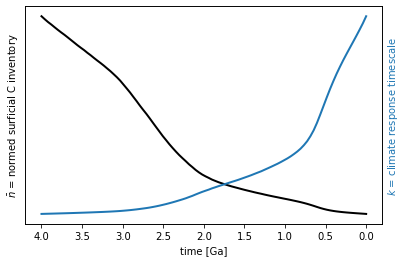

In [19]:
fig,ax = plt.subplots(1,figsize=(6.4,4))
ax.invert_xaxis()
ax.set_xlabel('time [Ga]')

color = 'k'
ax.plot(age,n_bar,color=color)
ax.set_ylabel(r'$\bar{n}$ = normed surficial C inventory',color=color)

ax = ax.twinx()
color = 'tab:blue'
ax.plot(age,k,color=color)
ax.set_ylabel('$k$ = climate response timescale',color=color)

for ax in fig.get_axes():
    ax.yaxis.set_ticks([])

plt.show()

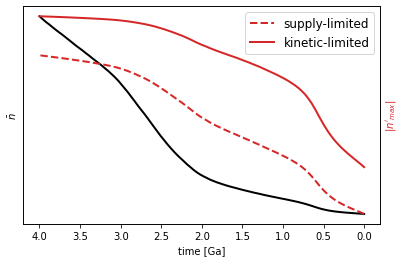

In [23]:
fig,ax = plt.subplots(1,figsize=(6.4,4))
ax.invert_xaxis()
ax.set_xlabel('time [Ga]')

color = 'k'
ax.plot(age,n_bar,color=color)
ax.set_ylabel(r'$\bar{n}$',color=color)

ax = ax.twinx()
color = 'tab:red'
ax.plot(age,n_dash_max_supply,color=color,ls='--',label='supply-limited')
ax.plot(age,n_dash_max_kinetic,color=color,label='kinetic-limited')
ax.legend()
ax.set_ylabel('|$n\'_{max}$|',color=color)

for ax in fig.get_axes():
    ax.yaxis.set_ticks([])

plt.show()

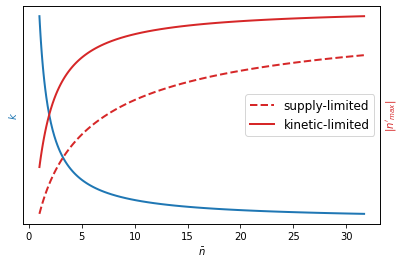

In [24]:
fig,ax = plt.subplots(1,figsize=(6.4,4))
ax.set_xlabel(r'$\bar{n}$')

color='tab:blue'
ax.plot(n_bar,k,color=color)
ax.set_ylabel('$k$',color=color)

ax=ax.twinx()
color='tab:red'
ax.plot(n_bar,n_dash_max_supply,color=color,ls='--',label='supply-limited')
ax.plot(n_bar,n_dash_max_kinetic,color=color,label='kinetic-limited')
ax.set_ylabel('|$n\'_{max}$|',color=color)
ax.legend(loc='center right')

for ax in fig.get_axes():
    ax.yaxis.set_ticks([])

plt.show()

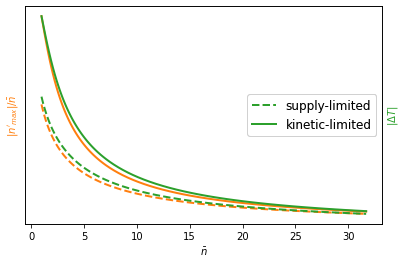

In [25]:
fig,ax = plt.subplots(1,figsize=(6.4,4))
ax.set_xlabel(r'$\bar{n}$')

color='tab:orange'
ax.plot(n_bar,n_dash_max_supply/n_bar,color=color,ls='--',label='supply-limited')
ax.plot(n_bar,n_dash_max_kinetic/n_bar,color=color,label='kinetic-limited')
ax.set_ylabel('|$n\'_{max}$|'+'/'+r'$\bar{n}$',color=color)
ax.legend(loc='center right')

color='tab:green'
ax=ax.twinx()
ax.plot(n_bar,delT_supply,color=color,ls='--',label='supply-limited')
ax.plot(n_bar,delT_kinetic,color=color,label='kinetic-limited')
ax.set_ylabel('|$\Delta T$|',color=color)
ax.legend(loc='center right')

for ax in fig.get_axes():
    ax.yaxis.set_ticks([])

plt.show()

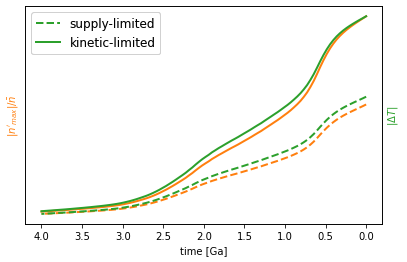

In [26]:
ig,ax = plt.subplots(1,figsize=(6.4,4))
ax.invert_xaxis()
ax.set_xlabel('time [Ga]')

color='tab:orange'
ax.plot(age,n_dash_max_supply/n_bar,color=color,ls='--',label='supply-limited')
ax.plot(age,n_dash_max_kinetic/n_bar,color=color,label='kinetic-limited')
ax.set_ylabel('|$n\'_{max}$|'+'/'+r'$\bar{n}$',color=color)
ax.legend(loc='upper left')
ax.yaxis.set_ticks([])

color='tab:green'
ax=ax.twinx()
ax.plot(age,delT_supply,color=color,ls='--',label='supply-limited')
ax.plot(age,delT_kinetic,color=color,label='kinetic-limited')
ax.set_ylabel('|$\Delta T$|',color=color)
ax.legend(loc='upper left')
ax.yaxis.set_ticks([])

plt.show()

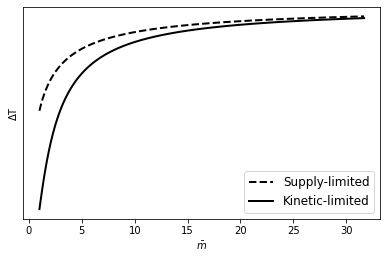

In [27]:
# FOR THE PAPER
delT_supply = np.log(((n_bar-n_dash_max_supply)/n_bar)**2)
delT_kinetic = np.log(((n_bar-n_dash_max_kinetic)/n_bar)**2)

fig,ax = plt.subplots(figsize=(6.4,3.9))

ax.set_xlabel(r'$\bar{m}$')
ax.plot(n_bar,delT_supply,color='k',ls='--',label='Supply-limited')
ax.plot(n_bar,delT_kinetic,color='k',label='Kinetic-limited')
ax.set_ylabel('$\Delta$T')
ax.legend(loc='lower right')

ax.yaxis.set_ticks([])

plt.savefig('figs/analytic'+'.jpg',format='jpg',bbox_inches='tight',dpi=600)
plt.show()

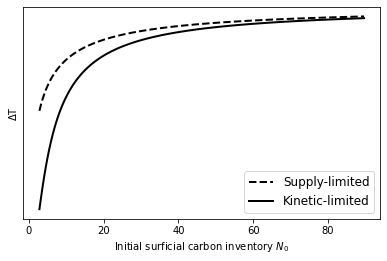

In [28]:
fig,ax = plt.subplots(figsize=(6.4,3.9))

ax.set_xlabel('Initial surficial carbon inventory $N_0$')
ax.plot(N_pi*n_bar,delT_supply,color='k',ls='--',label='Supply-limited')
ax.plot(N_pi*n_bar,delT_kinetic,color='k',label='Kinetic-limited')
ax.set_ylabel('$\Delta$T')
ax.legend(loc='lower right')

ax.yaxis.set_ticks([])

#plt.savefig('../figs/analytic',bbox_inches='tight',dpi=600)
plt.show()